In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../super123Database_final')

In [4]:
df = df.drop('Unnamed: 0', axis=1).drop('Unnamed: 0.1', axis=1)

In [5]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [6]:
y = df['critical_temp']
x = df.select_dtypes(exclude=['object']).drop('critical_temp', axis=1)

In [7]:
x

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,6,66.525876,40.871405,50.139277,29.985460,1.532445,1.586632,148.93092,11.630246,49.922349,...,2.333333,2.107692,2.289428,2.089266,1.772139,1.421106,1,0.984615,0.471405,0.309991
1,6,66.525876,41.732833,50.139277,30.239422,1.532445,1.586755,148.93092,11.892797,49.922349,...,2.333333,2.114943,2.289428,2.095417,1.772139,1.422691,1,1.003831,0.471405,0.318953
2,5,95.509280,55.855387,73.307186,36.670006,1.419515,1.552789,157.05460,9.559239,55.077433,...,2.200000,2.079302,2.168944,2.065354,1.594167,1.320298,1,0.921491,0.400000,0.270210
3,5,95.509280,56.483239,73.307186,36.810468,1.419515,1.524549,157.05460,11.033633,55.077433,...,2.200000,2.078989,2.168944,2.065091,1.594167,1.308431,1,0.957346,0.400000,0.269722
4,6,86.270733,54.012595,66.288745,35.923276,1.582046,1.542702,157.05460,16.429385,54.357061,...,2.166667,2.051917,2.139826,2.042547,1.778233,1.345217,1,0.985623,0.372678,0.221859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,4,97.481600,58.042005,70.110388,37.009719,1.154762,1.336993,157.05460,12.733189,61.420309,...,2.250000,2.077519,2.213364,2.063861,1.368922,1.205865,1,0.837209,0.433013,0.267414
2514,4,97.481600,57.944458,70.110388,36.937776,1.154762,1.337362,157.05460,12.666524,61.420309,...,2.250000,2.077340,2.213364,2.063711,1.368922,1.204651,1,0.839907,0.433013,0.267129
2515,4,97.481600,57.879678,70.110388,36.890077,1.154762,1.337606,157.05460,12.622253,61.420309,...,2.250000,2.077220,2.213364,2.063611,1.368922,1.203843,1,0.841699,0.433013,0.266940
2516,4,97.481600,57.815098,70.110388,36.842586,1.154762,1.337849,157.05460,12.578117,61.420309,...,2.250000,2.077101,2.213364,2.063511,1.368922,1.203035,1,0.843485,0.433013,0.266752


In [8]:
train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.2)
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

In [9]:
#rede neural com activator logistic de uma camada

In [10]:
neuralNet_logistic = MLPRegressor(hidden_layer_sizes = 90, activation = 'logistic', max_iter=2000)

In [11]:
neuralNet_logistic.fit(train_X, train_y)

MLPRegressor(activation='logistic', hidden_layer_sizes=90, max_iter=2000)

In [13]:
predictions_logistic = 0
avg_logistic = 0
for i in range(1, 30):
    predictions_logistic = neuralNet_logistic.predict(test_X)
    avg_logistic += sqrt(mean_absolute_error( predictions_logistic, test_y ))
print(str(avg_logistic/30))

4.458797247867821


In [14]:
predictions_logistic

array([58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.79303023,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47832652,
       58.47832652, 58.47832652, 58.47832652, 58.47832652, 58.47

In [15]:
test_y

array([ 66.   ,  86.   ,  91.6  ,  87.   ,  79.   ,  98.   ,  32.2  ,
        80.   ,  68.7  ,  18.   ,  71.6  ,  37.8  ,  70.   ,  82.   ,
        73.   ,  58.5  ,  61.38 ,  82.   ,  38.6  ,  91.01 ,  11.7  ,
        36.3  ,  60.   ,  70.   ,  73.8  ,  45.   ,  78.1  ,  31.8  ,
        59.4  ,  55.   ,  66.5  ,  77.   ,  86.7  ,  90.75 ,  50.   ,
        92.   ,  91.5  ,  84.5  ,  81.7  ,  80.6  ,  60.3  ,  92.2  ,
        35.   ,  82.5  ,  83.2  ,  79.   ,  89.5  ,  96.   ,  38.   ,
        86.1  ,  91.   ,  38.   ,  43.   ,  81.2  ,  64.   ,  75.1  ,
        72.5  ,  33.6  ,  35.   ,  20.5  ,  74.   ,  55.2  ,  68.8  ,
       105.   ,  45.8  ,  38.   ,  49.   ,  20.   ,  91.1  ,  40.   ,
        84.7  ,  64.2  ,  72.   ,  13.   ,  20.   ,  47.   ,  72.   ,
        95.   ,  76.8  ,  65.36 ,  76.8  ,  43.   ,  86.3  ,  72.   ,
        56.1  ,  60.2  ,  67.   ,  79.3  ,  88.   ,  35.   ,  80.   ,
        68.   ,  80.5  ,  86.9  ,  43.6  ,  81.   ,  66.   ,  40.   ,
        83.8  ,  88.

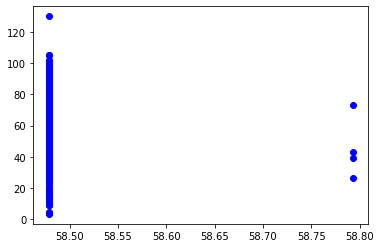

In [16]:
plt.plot(predictions_logistic, test_y, "bo")
plt.show()